hola Yair!

Mi nombre es Enrique y voy a estar revisando tu proyecto.

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

el proposito de este proyecto va ha ser evaluar cual de los planes de la compañia es el mas rentable analizando una muestra de 500 clientes aleatorios. lo primero que se debe hacer es preparar los datos como ocuparnos de los duplicados y los valores ausentes. y despues plantear las hipotesis en base a los dos planes para verificar cual es la mas rentable para la compañia

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users=pd.read_csv("/datasets/megaline_users.csv")
calls=pd.read_csv("/datasets/megaline_calls.csv")
messages=pd.read_csv("/datasets/megaline_messages.csv")
internet=pd.read_csv("/datasets/megaline_internet.csv")
plans=pd.read_csv("/datasets/megaline_plans.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] al parecer todos los datos son correctos 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]


In [5]:
plans["mb_per_month_included"] = plans["mb_per_month_included"]/ 1024  # Convierte a gigabytes
plans["mb_per_month_included"] = plans["mb_per_month_included"].astype("int")
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Observacion 1: Transforma los valores de megabytes a gigabytes en la columna 'mb_per_month_included'   Observacion 2: Convierte los valores de gigabytes a números enteros </div>

<div class="alert alert-block alert-info">
<b> Dejare aca hasta que corrijas y revises tambien los otros set de datos</b> <a class="tocSkip">  </a>
</div>

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] En cuanto a los valores nulos no los tiene el dataframe excepto en la columna churn_date donde la mayoria son nulos lo que nos indica que hay una mayoria de usuarios activos

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] 


## Llamadas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
# Imprime una muestra de datos para las llamadas
calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] 

por lo visto en el dataframe calls no existe datos nulos en ninguna de las columnas


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]
En esta parte voy a redondear la duracion de las llamadas hacia arriba

In [10]:
calls["duration"]=calls["duration"].apply(lambda x:math.ceil(x))
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
procedo a cambiar los datos de la columna call date a un tipo de fecha en phyton y aumentar el mes de la llamada

In [11]:
calls["call_date"]=pd.to_datetime(calls["call_date"])
calls["month"] = calls["call_date"].dt.strftime("%Y-%m")

## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Imprime una muestra de datos para los mensajes
messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Este dataframe de mensajes no tiene ningun problema con los valores ausentes

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
procedo a cambiar los datos de la columna message_date a un tipo de fecha en phyton

In [14]:
messages["message_date"]=pd.to_datetime(messages["message_date"])
messages["month"] = messages["message_date"].dt.strftime("%Y-%m")

## Internet

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
internet["mb_used"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


1693.47

In [16]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

no hay ningun problema con los datos ausentes en este dataframe

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
voy a agrupar el volumen de trafico de internet por usuario al mes

In [17]:
internet["session_date"]=pd.to_datetime(internet["session_date"])
internet["month"] = internet["session_date"].dt.strftime("%Y-%m")

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_id=calls.groupby(["user_id","month"])["user_id"].count().reset_index(name='numero_de_Llamadas')
calls_id


,user_id,month,numero_de_Llamadas
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [20]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutos_calls=calls.groupby(["user_id","month"])["duration"].sum().reset_index(name='minutos_usados')

minutos_calls


,user_id,month,minutos_usados
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2253,1498,2018-12,339
2254,1499,2018-09,346
2255,1499,2018-10,385
2256,1499,2018-11,308


In [21]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_user=messages.groupby(["user_id","month"])["user_id"].count().reset_index(name='numero_de_mensajes')
mensajes_user

,user_id,month,numero_de_mensajes
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [22]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_user=internet.groupby(["user_id","month"])["user_id"].count().reset_index(name='mb_usados')
internet_user 


,user_id,month,mb_usados
0,1000,2018-12,5
1,1001,2018-08,25
2,1001,2018-09,53
3,1001,2018-10,56
4,1001,2018-11,51
...,...,...,...
2272,1498,2018-12,65
2273,1499,2018-09,45
2274,1499,2018-10,61
2275,1499,2018-11,49


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen comienzo.
</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [23]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_month = pd.merge(calls_id,minutos_calls,on=['user_id',"month"], how='inner')
user_month = pd.merge(user_month,mensajes_user,on=['user_id',"month"], how='inner')
user_month = pd.merge(user_month,internet_user,on=['user_id',"month"], how='inner')
user_month


,user_id,month,numero_de_Llamadas,minutos_usados,numero_de_mensajes,mb_usados
0,1000,2018-12,16,124,11,5
1,1001,2018-08,27,182,30,25
2,1001,2018-09,49,315,44,53
3,1001,2018-10,65,393,53,56
4,1001,2018-11,64,426,36,51
...,...,...,...,...,...,...
1754,1496,2018-09,52,414,21,51
1755,1496,2018-10,46,317,18,54
1756,1496,2018-11,39,308,13,40
1757,1496,2018-12,40,294,11,53


In [24]:
# Añade la información de la tarifa
tarifa = pd.merge(users,plans,left_on = "plan",right_on = "plan_name")
df_ultimate = pd.merge(tarifa,user_month,on = "user_id")
pd.set_option("display.max_columns",None)
df_ultimate.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,month,numero_de_Llamadas,minutos_usados,numero_de_mensajes,mb_usados
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30,3000,70,7,0.01,0.01,ultimate,2018-12,16,124,11,5
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30,3000,70,7,0.01,0.01,ultimate,2018-11,2,10,15,7
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30,3000,70,7,0.01,0.01,ultimate,2018-12,9,59,139,63
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30,3000,70,7,0.01,0.01,ultimate,2018-10,71,476,21,57
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30,3000,70,7,0.01,0.01,ultimate,2018-11,63,446,37,72


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de MINUTOS, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [25]:
# Calcula el ingreso mensual para cada usuario
def conservar_positivos(valor):
    if valor < 0:
        return 0
    else:
        return valor
pay_minutes = (df_ultimate["minutos_usados"] - df_ultimate["minutes_included"]).apply(conservar_positivos)*df_ultimate["usd_per_minute"]
pay_messages = (df_ultimate["numero_de_mensajes"] - df_ultimate["messages_included"]).apply(conservar_positivos)*df_ultimate["usd_per_message"]
pay_mb = (df_ultimate["mb_usados"]- df_ultimate["mb_per_month_included"]).apply(conservar_positivos)
pay_mb = pay_mb / 1024  # Convierte a gigabytes
pay_mb = (pay_mb.apply(lambda x: math.ceil(x)))*df_ultimate["usd_per_gb"]
df_ultimate["pay_monthly"] = pay_minutes+pay_messages+pay_mb+df_ultimate["usd_monthly_pay"]
df_ultimate["pay_monthly"]

0       70.0
1       70.0
2       77.0
3       77.0
4       77.0
        ... 
1754    30.0
1755    30.0
1756    30.0
1757    30.0
1758    30.0
Name: pay_monthly, Length: 1759, dtype: float64

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

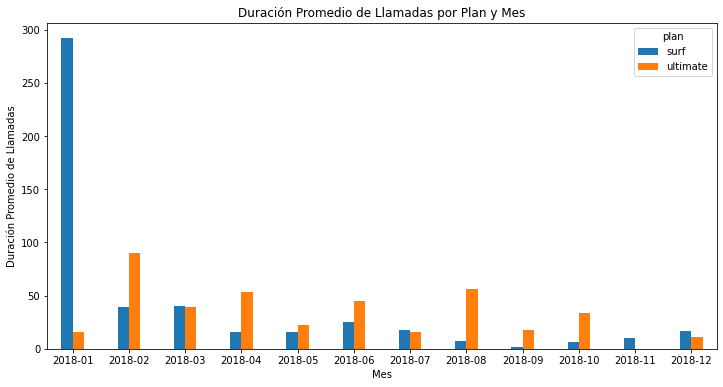

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#separo el mes y el año
df_ultimate[['moth', 'year']] = df_ultimate['month'].str.split('-', expand=True)

plan_month = df_ultimate.pivot_table(index="month",columns="plan",values="minutos_usados",aggfunc="min")
ax = plan_month.plot(kind='bar', figsize=(12, 6), width=0.4)

plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.legend(title='plan', loc='upper right')
plt.xticks(rotation=0)
plt.show()



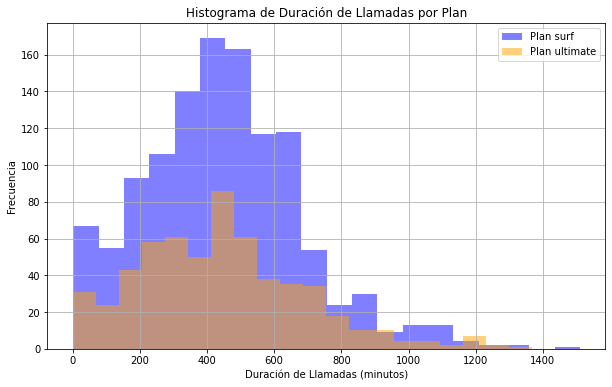

In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plan_surf=df_ultimate[df_ultimate["plan"]=="surf"]
plan_ultimate = df_ultimate[df_ultimate["plan"]=="ultimate"]
plt.figure(figsize=(10, 6))
plt.hist(plan_surf['minutos_usados'], bins=20, alpha=0.5, label='Plan surf', color='blue')
plt.hist(plan_ultimate['minutos_usados'], bins=20, alpha=0.5, label='Plan ultimate', color='orange')

plt.xlabel('Duración de Llamadas (minutos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración de Llamadas por Plan')
plt.legend()
plt.grid(True)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [28]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_calls= df_ultimate.groupby("month")["minutos_usados"].mean()
varianza_calls = df_ultimate.groupby("month")["minutos_usados"].var()
std_deviation = df_ultimate.groupby("month")["minutos_usados"].std()

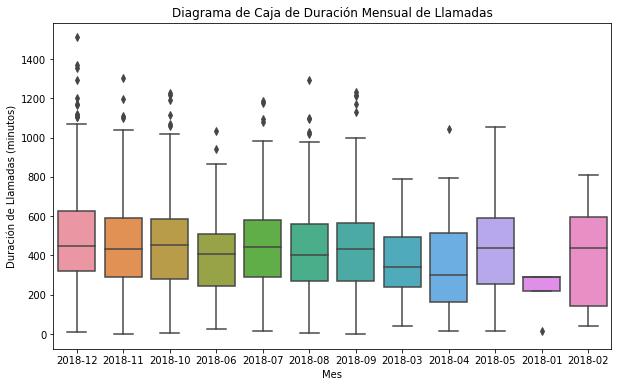

In [29]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ultimate, x='month', y='minutos_usados')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas (minutos)')
plt.title('Diagrama de Caja de Duración Mensual de Llamadas')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

por alguna razon los usuarios del plan surf tienen un mayor consumo de llamadas y sugum el grafico de cajas hay una duracion promedio de 400 min al mes de ambos planes unidos

### Mensajes

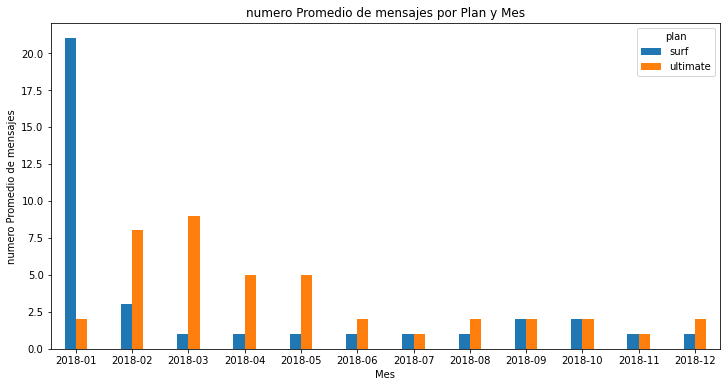

In [30]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

plan_month = df_ultimate.pivot_table(index="month",columns="plan",values="numero_de_mensajes",aggfunc="min")
ax = plan_month.plot(kind='bar', figsize=(12, 6), width=0.4)

plt.xlabel('Mes')
plt.ylabel('numero Promedio de mensajes')
plt.title('numero Promedio de mensajes por Plan y Mes')
plt.legend(title='plan', loc='upper right')
plt.xticks(rotation=0)
plt.show()


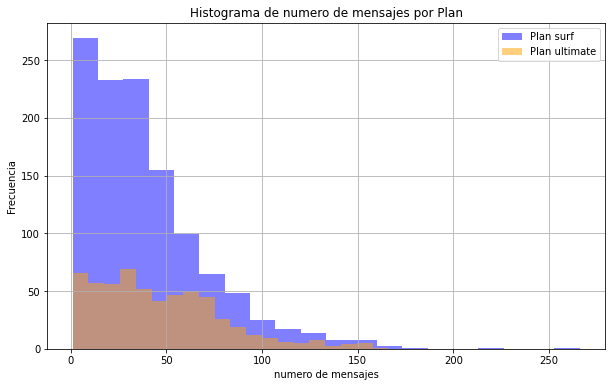

In [31]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plan_surf=df_ultimate[df_ultimate["plan"]=="surf"]
plan_ultimate = df_ultimate[df_ultimate["plan"]=="ultimate"]
plt.figure(figsize=(10, 6))
plt.hist(plan_surf['numero_de_mensajes'], bins=20, alpha=0.5, label='Plan surf', color='blue')
plt.hist(plan_ultimate['numero_de_mensajes'], bins=20, alpha=0.5, label='Plan ultimate', color='orange')

plt.xlabel('numero de mensajes')
plt.ylabel('Frecuencia')
plt.title('Histograma de numero de mensajes por Plan')
plt.legend()
plt.grid(True)
plt.show()


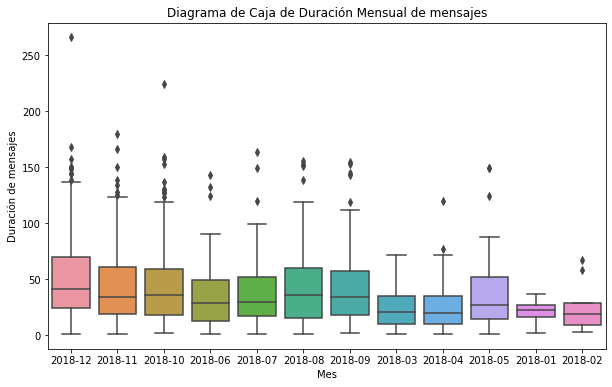

In [32]:
media_messages= df_ultimate.groupby("month")["numero_de_mensajes"].mean()
varianza_messages = df_ultimate.groupby("month")["numero_de_mensajes"].var()
std_deviation = df_ultimate.groupby("month")["numero_de_mensajes"].std()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ultimate, x='month', y='numero_de_mensajes')
plt.xlabel('Mes')
plt.ylabel('Duración de mensajes')
plt.title('Diagrama de Caja de Duración Mensual de mensajes')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

los usuarios del plan surf manda mas mensajes en comparacion a los usuarios del plan ultimate y segun el grafico de cajas se envian en promedio 40 a 30 mensajes al mes tomando en cuenta los dos planes

### Internet

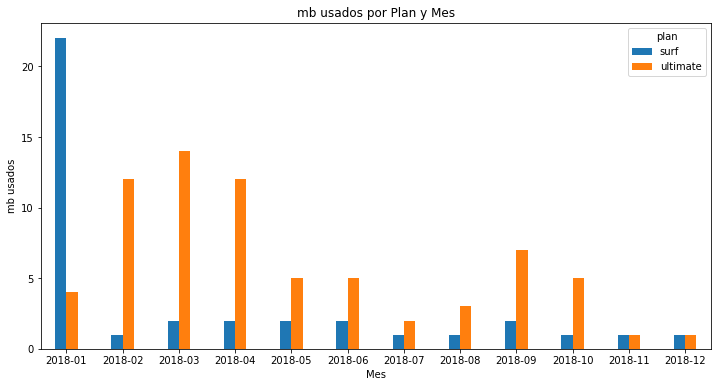

In [33]:

plan_month = df_ultimate.pivot_table(index="month",columns="plan",values="mb_usados",aggfunc="min")

ax = plan_month.plot(kind='bar', figsize=(12, 6), width=0.4)

plt.xlabel('Mes')
plt.ylabel('mb usados')
plt.title('mb usados por Plan y Mes')
plt.legend(title='plan', loc='upper right')
plt.xticks(rotation=0)
plt.show()

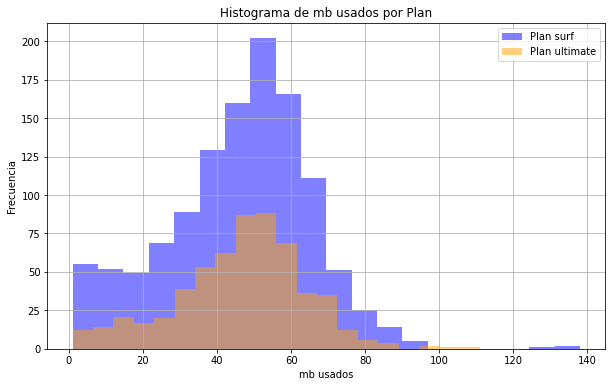

In [34]:
plan_surf=df_ultimate[df_ultimate["plan"]=="surf"]
plan_ultimate = df_ultimate[df_ultimate["plan"]=="ultimate"]
plt.figure(figsize=(10, 6))
plt.hist(plan_surf['mb_usados'], bins=20, alpha=0.5, label='Plan surf', color='blue')
plt.hist(plan_ultimate['mb_usados'], bins=20, alpha=0.5, label='Plan ultimate', color='orange')

plt.xlabel('mb usados')
plt.ylabel('Frecuencia')
plt.title('Histograma de mb usados por Plan')
plt.legend()
plt.grid(True)
plt.show()

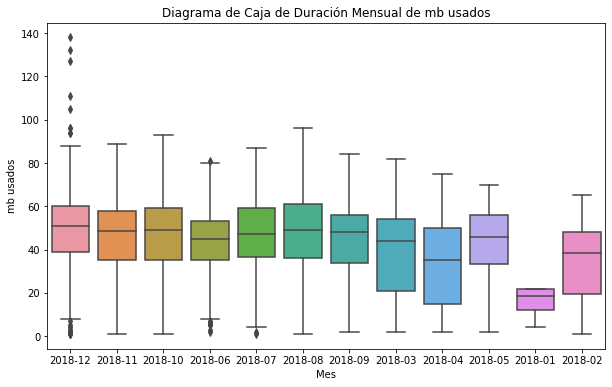

In [35]:
media_mb= df_ultimate.groupby("month")["mb_usados"].mean()
varianza_mb = df_ultimate.groupby("month")["mb_usados"].var()
std_deviation = df_ultimate.groupby("month")["mb_usados"].std()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ultimate, x='month', y='mb_usados')
plt.xlabel('Mes')
plt.ylabel('mb usados')
plt.title('Diagrama de Caja de Duración Mensual de mb usados')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

los usuarios del plan surf tienen un consumo mas alto en mb que los usuarios del plan ultimate y segun el grafico de cajas hay 40 mb promedio que se gastan al mes tomando en cuenta ambos planes

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente
</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

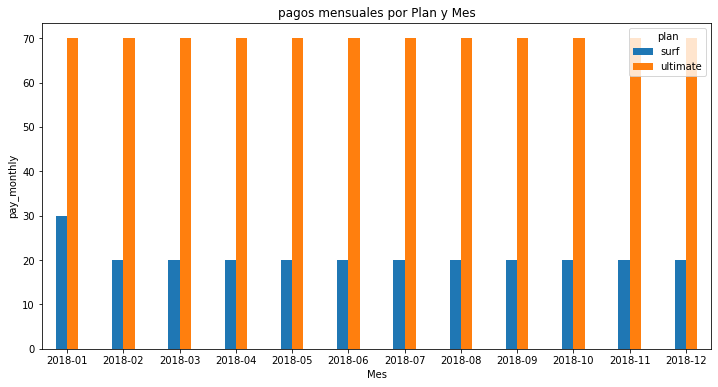

In [36]:

plan_month = df_ultimate.pivot_table(index="month",columns="plan",values="pay_monthly",aggfunc="min")

ax = plan_month.plot(kind='bar', figsize=(12, 6), width=0.4)

plt.xlabel('Mes')
plt.ylabel('pay_monthly')
plt.title('pagos mensuales por Plan y Mes')
plt.legend(title='plan', loc='upper right')
plt.xticks(rotation=0)
plt.show()

77.0    483
70.0     96
Name: pay_monthly, dtype: int64

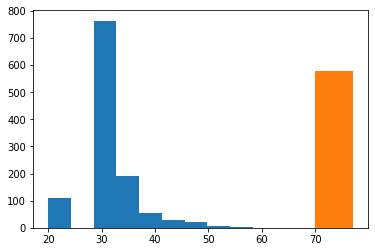

In [37]:
plan_surf=df_ultimate[df_ultimate["plan"]=="surf"]
plan_ultimate = df_ultimate[df_ultimate["plan"]=="ultimate"]
#plt.figure(figsize=(10, 6))
fig,ax=plt.subplots(1,1)
ax.hist(plan_surf['pay_monthly'],bins=10)

ax.hist(plan_ultimate['pay_monthly'],bins=1)
plan_ultimate["pay_monthly"].value_counts()
#plt.xlabel('pagos mensuales')
#plt.ylabel('Frecuencia')
#plt.title('Histograma de pagos por Plan')
#plt.legend()
#plt.grid(True)
#plt.show()


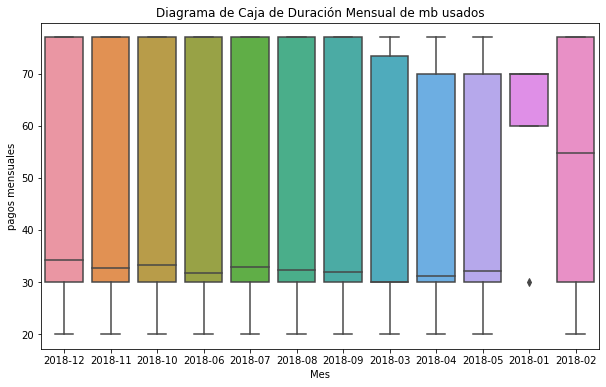

In [38]:
media_mb= df_ultimate.groupby("month")["pay_monthly"].mean()
varianza_mb = df_ultimate.groupby("month")["pay_monthly"].var()
std_deviation = df_ultimate.groupby("month")["pay_monthly"].std()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ultimate, x='month', y='pay_monthly')
plt.xlabel('Mes')
plt.ylabel('pagos mensuales')
plt.title('Diagrama de Caja de Duración Mensual de mb usados')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]el ingreso en el plan ultimate es superior por 50 usd al plan surf

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula: Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales.

Hipotesis alternativa: son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

Para este caso utilizare una prueba estadistica bilateral (dos colas) para comparar los dos planes con un alpha de 0.05

In [39]:
# Prueba las hipótesis
plan_surf=df_ultimate[df_ultimate["plan"]=="surf"]["pay_monthly"]
plan_ultimate=df_ultimate[df_ultimate["plan"]=="ultimate"]["pay_monthly"]
alpha = 0.05 
results = st.ttest_ind(plan_surf, plan_ultimate)
print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 


valor p:  0.0
Rechazamos la hipótesis nula


Conclusion: Como 0.00 < 0.05, esto significa que el valor p es menor que el nivel de significación. Según mi criterio con alfa del 5%, decido rechazar la hipótesis nula (H0).
Concluyo que hay evidencia suficiente para afirmar que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf a un nivel de significación del 5%. 

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones

Hipotesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
Hare una prueba bilateral en este caso y alpha sera 0.05

In [40]:
# Prueba las hipótesis

ny_nj= df_ultimate[df_ultimate["city"]=='New York-Newark-Jersey City, NY-NJ-PA MSA']["pay_monthly"]
other = df_ultimate[df_ultimate["city"] !='New York-Newark-Jersey City, NY-NJ-PA MSA']["pay_monthly"]
alpha = 0.05
results = st.ttest_ind(ny_nj,other)
print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  3.325571941786758e-05
Rechazamos la hipótesis nula


Conclusion: Como 1.1157062240822187e-05 < 0.05, esto significa que el valor p es menor que el nivel de significación. Según mi criterio con alfa del 5%, decido rechazar la hipótesis nula (H0). Concluyo que hay evidencia suficiente para afirmar que El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones a un nivel de significación del 5%.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Te aconsejo colocar las conclusiones al final siempre en la ultima sección y hacer un resumen de los resultados parciales junto con tus resultados de las pruebas de  hipotesis 
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

